In [8]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.io as sio
np.random.seed(7)

In [9]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/Indian_pines_corrected.mat')['indian_pines_corrected']
Label=sio.loadmat('/content/drive/MyDrive/datasets/Indian_pines_gt.mat')['indian_pines_gt']

Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [10]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [12]:

lda=LDA()
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)




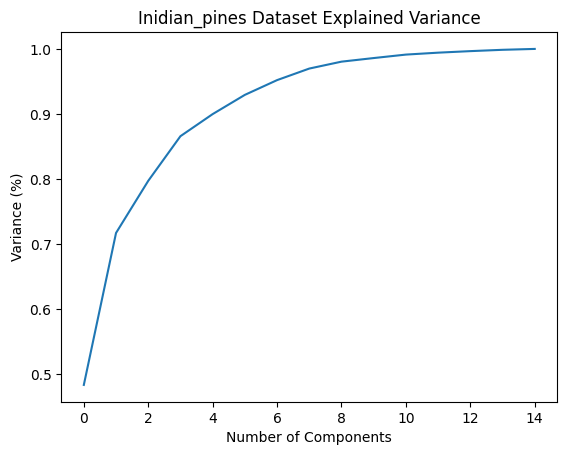

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Inidian_pines Dataset Explained Variance')
plt.show()


In [14]:
from sklearn.svm import SVC
from sklearn import metrics
# C_2d_range = range(10)/0.1
# gamma_2d_range = [0.01,0.1,0.2,0.3,1]
classifiers = []
# C_range=10
# Gamma_range = 10
Train_acc=[]
Valid_acc=[]
accuracy = -1
accuracy_train = -1
for C in np.arange(1,102,25):
    for gamma in np.arange(0.001,0.1,0.005):

        clf = SVC(C=C, gamma=gamma)
        print("----------------------------------------------------------------")
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        y_pred = clf.predict(X_train)
        acc_train =metrics.accuracy_score(y_train, y_pred)
        Train_acc.append(acc_train)
        y_pred = clf.predict(X_test)
        acc=metrics.accuracy_score(y_test, y_pred)
        Valid_acc.append(acc)
        if (acc_train>accuracy_train):

            accuracy_train=acc_train
            best_c_train = C
            best_g_train=gamma
        print("C_train= ",C," Best C_train = ",best_c_train," gamma_train = ",gamma," best_gamma_train= ",best_g_train," Accuracy_train = ",acc_train," Best Accuracy_train = ",accuracy_train,"\n")

        if (acc>accuracy):
            accuracy=acc
            best_c = C
            best_g=gamma

        print("C= ",C," Best C = ",best_c," gamma = ",gamma," best_gamma= ",best_g," Accuracy = ",acc," Best Accuracy = ",accuracy,"\n")




----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.001  best_gamma_train=  0.001  Accuracy_train =  0.8332723502866203  Best Accuracy_train =  0.8332723502866203 

C=  1  Best C =  1  gamma =  0.001  best_gamma=  0.001  Accuracy =  0.811219512195122  Best Accuracy =  0.811219512195122 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.006  best_gamma_train=  0.006  Accuracy_train =  0.8653494328576655  Best Accuracy_train =  0.8653494328576655 

C=  1  Best C =  1  gamma =  0.006  best_gamma=  0.006  Accuracy =  0.8341463414634146  Best Accuracy =  0.8341463414634146 

----------------------------------------------------------------
C_train=  1  Best C_train =  1  gamma_train =  0.011  best_gamma_train=  0.011  Accuracy_train =  0.8774240761068423  Best Accuracy_train =  0.8774240761068423 

C=  1  Best C =  1  gamma =  0.011  best_gamma=  0.011  Accuracy =  0

In [15]:
import pandas as pd
clf = SVC(C=51,gamma=0.006,decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))


Accuracy : 86.63414634146342
Cohen Kappa Score : 84.74414046798036
              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       0.84      0.84      0.84       286
           3       0.80      0.75      0.77       166
           4       0.95      0.77      0.85        47
           5       0.90      0.97      0.94        97
           6       0.98      0.96      0.97       146
           7       1.00      1.00      1.00         5
           8       0.99      1.00      0.99        96
           9       0.80      1.00      0.89         4
          10       0.79      0.78      0.78       194
          11       0.82      0.84      0.83       491
          12       0.81      0.84      0.82       119
          13       1.00      0.98      0.99        41
          14       0.96      0.97      0.96       253
          15       0.80      0.79      0.80        77
          16       1.00      0.95      0.97        19

    accuracy 

In [ ]:
print(pd.DataFrame(mat))

    0    1    2   3   4    5   6   7   8    9    10   11  12   13  14  15
0    8    0    0   0   0    0   0   0   0    0    0    0   0    0   0   0
1    0  240    7   2   0    1   0   0   0   13   22    1   0    0   0   0
2    0    4  125   6   0    0   0   0   0    2   13    7   0    0   0   0
3    0    1    0  36   0    0   0   0   0    0    0    1   0    0   0   0
4    0    0    0   1  94    0   0   0   0    0    5    1   0    0   3   0
5    0    0    0   0   1  140   0   0   0    0    0    0   0    0   2   0
6    0    0    0   0   0    0   5   0   0    0    0    0   0    0   0   0
7    1    0    0   0   0    0   0  96   0    0    0    0   0    0   0   0
8    0    0    0   0   0    0   0   0   4    1    0    0   0    0   0   0
9    0   13    0   0   0    0   0   0   0  151   27    0   0    0   1   0
10   0   26   23   2   0    0   0   0   0   27  413    8   1    0   0   1
11   0    2   11   0   0    0   0   0   0    0   11  100   0    0   0   0
12   0    0    0   0   0    0   0   0 